# Анализ сервиса аренды самокатов GoFast

## Описание проекта
Цель проекта: проанализировать данные сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
### Вводная информация
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
   * без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
   * с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

### Данные таблиц

Пользователи — `users_go.csv`

* `user_id` — уникальный идентификатор пользователя;
* `name` — имя пользователя;
* `age` — возраст пользователя;
* `city` — город пользователя;
* `subscription_type` — тип подписки (`free`, `ultra`).

Поездки — `rides_go.csv`

* `user_id` — уникальный идентификатор пользователя;
* `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах);
* `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* `date` — дата совершения поездки.

Подписки — `subscriptions_go.csv`

* `subscription_type` — тип подписки;
* `minute_price` — стоимость одной минуты поездки по данной подписке;
* `start_ride_price` — стоимость начала поездки;
* `subscription_fee` — стоимость ежемесячного платёж.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Вводная-информация" data-toc-modified-id="Вводная-информация-1.1">Вводная информация</a></span></li><li><span><a href="#Данные-таблиц" data-toc-modified-id="Данные-таблиц-1.2">Данные таблиц</a></span></li></ul></li><li><span><a href="#Шаг-1.-Загрузка-данных" data-toc-modified-id="Шаг-1.-Загрузка-данных-2">Шаг 1. Загрузка данных</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-3">Шаг 2. Предобработка данных</a></span></li><li><span><a href="#Шаг-3.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг-3.-Исследовательский-анализ-данных-4">Шаг 3. Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Функции" data-toc-modified-id="Функции-4.1">Функции</a></span></li><li><span><a href="#Города-пользователей" data-toc-modified-id="Города-пользователей-4.2">Города пользователей</a></span></li><li><span><a href="#Типы-подписок-пользоватлей" data-toc-modified-id="Типы-подписок-пользоватлей-4.3">Типы подписок пользоватлей</a></span></li><li><span><a href="#Распределение-пользователей-по-возрастам" data-toc-modified-id="Распределение-пользователей-по-возрастам-4.4">Распределение пользователей по возрастам</a></span></li><li><span><a href="#Распределение-количества-поездок-по-их-дистанции" data-toc-modified-id="Распределение-количества-поездок-по-их-дистанции-4.5">Распределение количества поездок по их дистанции</a></span></li><li><span><a href="#Распределение-количества-поездок-по-их-продолжительности" data-toc-modified-id="Распределение-количества-поездок-по-их-продолжительности-4.6">Распределение количества поездок по их продолжительности</a></span></li></ul></li><li><span><a href="#Шаг-4.-Объединение-данных" data-toc-modified-id="Шаг-4.-Объединение-данных-5">Шаг 4. Объединение данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-объединённых-данных" data-toc-modified-id="Анализ-объединённых-данных-5.1">Анализ объединённых данных</a></span></li></ul></li><li><span><a href="#Шаг-5.-Подсчёт-выручки" data-toc-modified-id="Шаг-5.-Подсчёт-выручки-6">Шаг 5. Подсчёт выручки</a></span></li><li><span><a href="#Шаг-6.-Проверка-гипотез" data-toc-modified-id="Шаг-6.-Проверка-гипотез-7">Шаг 6. Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-7.1">Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-7.2">Гипотеза 2</a></span></li><li><span><a href="#Гипотеза-3" data-toc-modified-id="Гипотеза-3-7.3">Гипотеза 3</a></span></li><li><span><a href="#Ситуация" data-toc-modified-id="Ситуация-7.4">Ситуация</a></span></li></ul></li><li><span><a href="#Шаг-7.-Распределения" data-toc-modified-id="Шаг-7.-Распределения-8">Шаг 7. Распределения</a></span></li><li><span><a href="#Шаг-8.-Общий-вывод" data-toc-modified-id="Шаг-8.-Общий-вывод-9">Шаг 8. Общий вывод</a></span></li></ul></div>

## Шаг 1. Загрузка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st
from scipy.stats import binom, norm
from math import factorial
from math import sqrt
pd.set_option('display.max_columns', None) # снимаем ограничение на количество столбцов
pd.set_option('display.max_colwidth', None) # снимаем ограничение на ширину столбцов

In [2]:
# загрузка таблиц
users = pd.read_csv('/datasets/users_go.csv')
riders = pd.read_csv('/datasets/rides_go.csv')
subs = pd.read_csv('/datasets/subscriptions_go.csv')

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


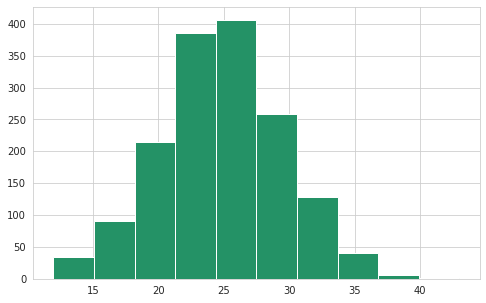

In [3]:
display(users.head())
display(users.info())
display(users.describe())

# устанавливаем стиль графиков
sns.set_style('whitegrid')
sns.set_palette('summer')

users['age'].hist(figsize=(8, 5))
plt.show()

Таблица `users` состоит из 5 колонок, не имеет пропусков. Все типы данных соответствуют необходимым. Данные возраста имеют нормальное распределение. Самые многочисленные категории пользователей в возрасте от 20 до 30 лет (минимальный возраст - 12 лет, а максимальный - 43 года).

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


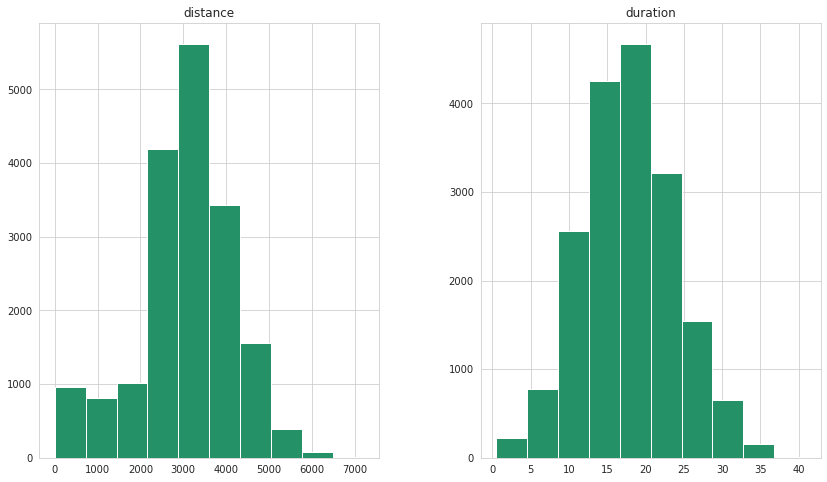

In [4]:
display(riders.head())
display(riders.info())
display(riders.describe())
riders[['distance', 'duration', 'date']].hist(figsize=(14, 8))
plt.show()

Таблица с данными о поездках содержит 4 колонки, не имеет пропусков. Столбец с информацией о дате поездки нуждается в изменении типа данных. Данные о расстоянии и времени 1 поездки имеют нормальное распределение. В среднем пользователи проезжают чуть больше 3 км за 1 поездку, а времени на это затрачивается от 15 до 20 минут.

In [5]:
display(subs.head())
display(subs.info())
display(subs.describe())

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Таблица с информацией о типах подписки содержит 4 столбца и всего лишь 2 строки, соответствующие информации о 2 типах подписок. Соответственно, пропусков нет и смысла строить распределения тоже нет.

## Шаг 2. Предобработка данных

Исходя из представленной информации, пропусков в данных нет. Необходимо исправить тип данных для поля с датой, добавить столбец с номером месяца и исследовать дубликаты.

In [6]:
riders['date'] = pd.to_datetime(riders['date'], format='%Y-%m-%d')
riders.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

In [7]:
riders['month'] = riders['date'].dt.month
riders['month_cal'] = riders['date'].dt.to_period('M').dt.to_timestamp()
display(riders.head(3))
riders.dtypes

,user_id,distance,duration,date,month,month_cal
0,1,4409.919140,25.599769,2021-01-01,1,2021-01-01
1,1,2617.592153,15.816871,2021-01-18,1,2021-01-01
2,1,754.159807,6.232113,2021-04-20,4,2021-04-01


user_id               int64
distance            float64
duration            float64
date         datetime64[ns]
month                 int64
month_cal    datetime64[ns]
dtype: object

Теперь все типы данных соответствуют необходимым. Проверим явные дубликаты.

In [8]:
display(users.duplicated().sum())
display(riders.duplicated().sum())
subs.duplicated().sum()

31

0

0

Необходимо удалить явные дубликаты.

In [9]:
users.drop_duplicates(inplace=True)

In [10]:
users.name.unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

Данные имён не содержат некорректных значений.

In [11]:
users.age.unique()

array([22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 29, 32, 14, 19, 30, 17,
       12, 35, 33, 13, 15, 37, 16, 34, 38, 36, 39, 43])

In [12]:
users.age.nunique()

29

Данные имён не содержат некорректных значений (выбросов).

In [13]:
users.city.unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Пользователи 8 городов уже пользуются сервисом.

In [14]:
print('Минимальная дата :', riders['date'].min())
print('Максимальная дата:', riders['date'].max())

Минимальная дата : 2021-01-01 00:00:00
Максимальная дата: 2021-12-30 00:00:00


Данные содержат информацию за 1 календарный год. Проверим выбросы по логическому критерию.

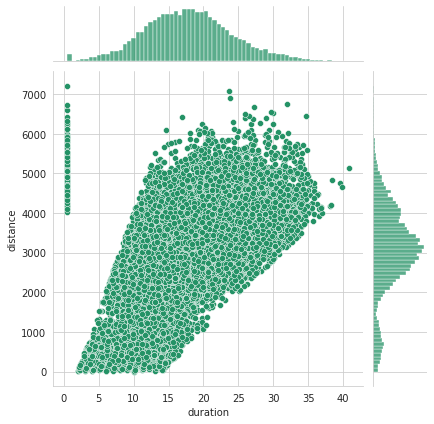

In [15]:
sns.jointplot(x='duration', y='distance', data=riders)
plt.show()

Область слева сверху явно выделяется среди остальных.

In [16]:
not_rides = riders.query('distance>=4000 & duration<5')
not_rides

,user_id,distance,duration,date,month,month_cal
6531,701,4196.445201,0.5,2021-08-31,8,2021-08-01
6570,704,4830.824371,0.5,2021-10-14,10,2021-10-01
6680,712,4684.004397,0.5,2021-03-04,3,2021-03-01
6695,713,5215.642710,0.5,2021-02-25,2,2021-02-01
6768,718,5197.436649,0.5,2021-02-11,2,2021-02-01
...,...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1,2021-01-01
17242,1477,6724.932981,0.5,2021-01-12,1,2021-01-01
17314,1483,4445.481070,0.5,2021-03-06,3,2021-03-01
17505,1496,5722.551787,0.5,2021-02-14,2,2021-02-01


Либо неекоторые пользователи ужитрились ровно за поминуты проехать от 4 до 6 км, либо наблюдались очевидные сбои в работе сервиса (например, попытки поехать на почти разряженном самокате).

In [17]:
not_rides_share = not_rides.shape[0] / riders.shape[0]
print(f'Доля выбросов в процентах составляет: {not_rides_share :.2%}')

Доля выбросов в процентах составляет: 0.53%


Несмотря на явную некорректность данных (возможно, сбои), нецелесообразно удалять данные, так как за них также начислялась плата, и удаление повлияет на выручку.

## Шаг 3. Исследовательский анализ данных
### Функции

In [18]:
# функция группировки значений
def quality_group(table, column):
    result = table.groupby([column])[column].agg(['count']).sort_values(by='count')
    result['percent'] = round(result['count'] / result['count'].sum(), 4)*100
    return result

In [19]:
# функция визуализации столбцов с качественными данными
def quality_viz(table, column, xlabel, ylabel, title):
    gr = quality_group(table, column)
    gr.columns = {'Количество':'count', 'Доля':'percent'}
    plt.barh(
        gr.index, 
        gr['Количество'].values
    )
    plt.gca().set(xlabel=f'${xlabel}$', ylabel=f'${ylabel}$')
    plt.title(f'{title}')
    plt.show()
    print('Значения датафрейма:')
    print(gr)

In [20]:
# функция визуализации столбцов с количественными данными
def quantity_viz(table, column, bins_num, xlabel, ylabel, title):
    table[column].hist(bins=bins_num, figsize=(14,6))
    plt.gca().set(xlabel=f'${xlabel}$', ylabel=f'${ylabel}$')
    plt.title(f'{title}')
    plt.show()
    print('Описательная статистика датафрейма:')
    print(table[column].describe())

### Города пользователей

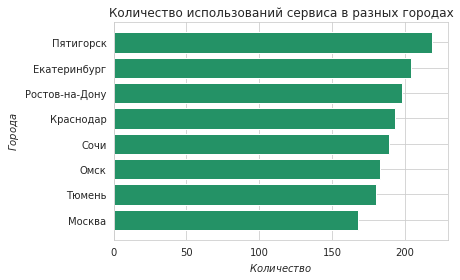

Значения датафрейма:
                Количество   Доля
city                             
Москва                 168  10.95
Тюмень                 180  11.73
Омск                   183  11.93
Сочи                   189  12.32
Краснодар              193  12.58
Ростов-на-Дону         198  12.91
Екатеринбург           204  13.30
Пятигорск              219  14.28


In [21]:
quality_viz(
    users, 
    'city', 
    'Количество', 
    'Города', 
    'Количество использований сервиса в разных городах'
)

Большинство пользователей сервиса сосредоточено в Пятигорске, а меньше всего - в Москве.

### Типы подписок пользоватлей

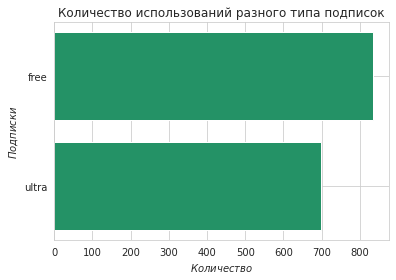

Значения датафрейма:
                   Количество   Доля
subscription_type                   
ultra                     699  45.57
free                      835  54.43


In [22]:
quality_viz(
    users, 
    'subscription_type', 
    'Количество', 
    'Подписки', 
    'Количество использований разного типа подписок'
)

У большинства пользователей нет платной подписки.

### Распределение пользователей по возрастам

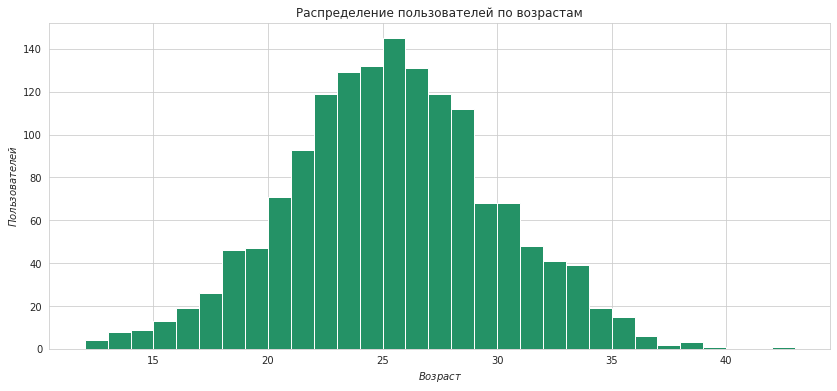

Описательная статистика датафрейма:
count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


In [23]:
quantity_viz(
    users, 
    'age', 
    users['age'].max()-users['age'].min(), 
    'Возраст', 
    'Пользователей',
    'Распределение пользователей по возрастам' 
)

Около половины пользователей в возрасте от 22 до 28 лет. Средний возраст пользователей составляет почти 25 лет.

### Распределение количества поездок по их дистанции

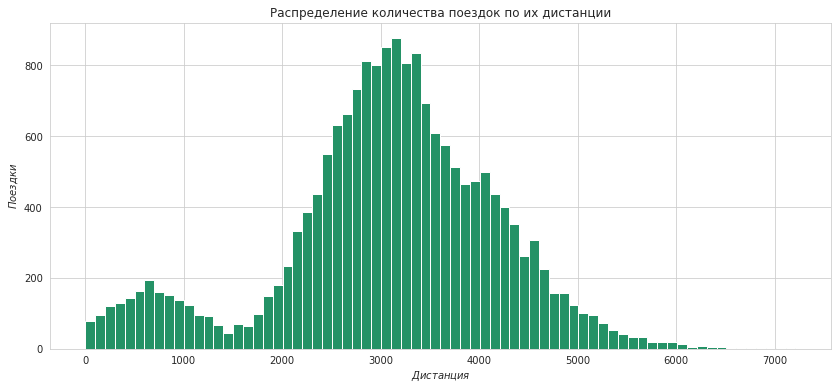

Описательная статистика датафрейма:
count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


In [24]:
quantity_viz(
    riders, 
    'distance', 
    int((riders['distance'].max()-riders['distance'].min()) / 100), 
    'Дистанция', 
    'Поездки', 
    'Распределение количества поездок по их дистанции' 
)

Основные типы дистанций поездок пользователей сосредоточены в интервалах от 0 до 1.3 км и от 1.8 км до 4.6 км. Для более далёких дистанций удобнее пользоваться общественным транспортом или идти пешком. Некоторые поездки совершаются не в качестве маршрута от точки до точки, а в качестве прогулочного маршрута.

### Распределение количества поездок по их продолжительности

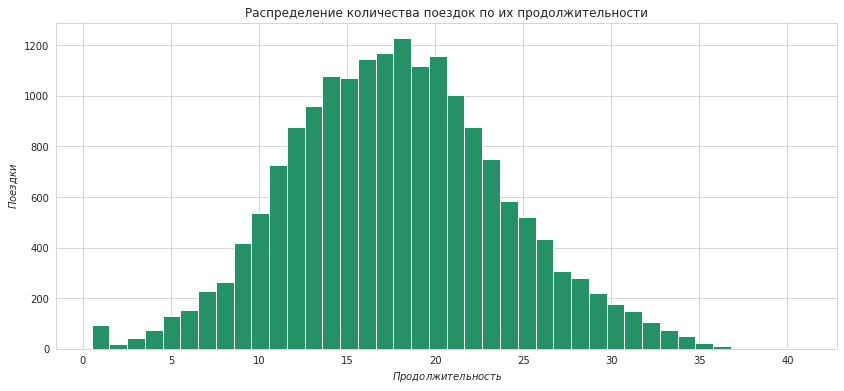

Описательная статистика датафрейма:
count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


In [25]:
quantity_viz(
    riders, 
    'duration', 
    int((riders['duration'].max()-riders['duration'].min())), 
    'Продолжительность', 
    'Поездки', 
    'Распределение количества поездок по их продолжительности' 
)

Поездки меньше 5 минут связаны со сбоями или же необходимостью быстро добраться до близкой точки, остальные же скорее ориентированы на более дальние передвижения или прогулочные маршруты. Самая продолжительная поездка длилась почти 41 минуту. Стандартный интервал времени - 15-20 минут.

## Шаг 4. Объединение данных

In [26]:
data = users.merge(riders, on='user_id').merge(subs, on='subscription_type')
display(data.sample(5, random_state=5))
data.info()

,user_id,name,age,city,subscription_type,distance,duration,date,month,month_cal,minute_price,start_ride_price,subscription_fee
11238,1047,Дмитрий,23,Сочи,free,3984.064985,21.865632,2021-04-14,4,2021-04-01,8,50,0
4787,515,Руслан,23,Екатеринбург,ultra,3074.222179,19.296889,2021-06-03,6,2021-06-01,6,0,199
6705,713,Святослав,30,Краснодар,free,2223.170062,17.940378,2021-11-19,11,2021-11-01,8,50,0
1764,191,Марсель,23,Омск,ultra,2883.026586,19.653138,2021-09-20,9,2021-09-01,6,0,199
18054,1533,Степан,22,Краснодар,free,3414.448028,25.657792,2021-11-09,11,2021-11-01,8,50,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   month_cal          18068 non-null  datetime64[ns]
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(6), object(3)
memory 

Витрина данных содержит 12 столбцов и 18 068 записей.

In [27]:
# создание таблицы с поездками пользователей без подписки
free = data.query("subscription_type == 'free'") 
display(free.describe())
free.sample(5, random_state=5)

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


,user_id,name,age,city,subscription_type,distance,duration,date,month,month_cal,minute_price,start_ride_price,subscription_fee
16647,1432,Федор,23,Тюмень,free,3565.105045,20.454331,2021-03-13,3,2021-03-01,8,50,0
12371,1130,Мария,22,Ростов-на-Дону,free,987.618579,7.116326,2021-03-01,3,2021-03-01,8,50,0
14236,1260,Одиссей,26,Москва,free,5237.070637,17.474141,2021-08-30,8,2021-08-01,8,50,0
14318,1266,Альберт,22,Пятигорск,free,4846.025990,29.432869,2021-03-27,3,2021-03-01,8,50,0
6933,729,Арсен,27,Екатеринбург,free,3197.284798,10.105077,2021-11-13,11,2021-11-01,8,50,0


In [28]:
# создание таблицы с поездками пользователей с подпиской
ultra = data.query("subscription_type == 'ultra'")
display(ultra.describe())
ultra.sample(5, random_state=5)

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


,user_id,name,age,city,subscription_type,distance,duration,date,month,month_cal,minute_price,start_ride_price,subscription_fee
2361,251,Василий,20,Сочи,ultra,2510.175651,20.171930,2021-04-14,4,2021-04-01,6,0,199
1170,125,Андрей,20,Тюмень,ultra,2629.937807,17.069087,2021-08-25,8,2021-08-01,6,0,199
3196,346,Родион,22,Тюмень,ultra,3419.323760,23.781494,2021-09-28,9,2021-09-01,6,0,199
1701,184,Эльвира,15,Пятигорск,ultra,3778.142903,23.437583,2021-04-20,4,2021-04-01,6,0,199
1367,147,Артемий,28,Ростов-на-Дону,ultra,4151.389212,32.160258,2021-11-28,11,2021-11-01,6,0,199


Пользователей без подписки больше на пару сотен, но поездок у таких пользователей больше почти в 2 раза. Сбои по времени поездок связаны только с пользователями без подписки.

### Анализ объединённых данных

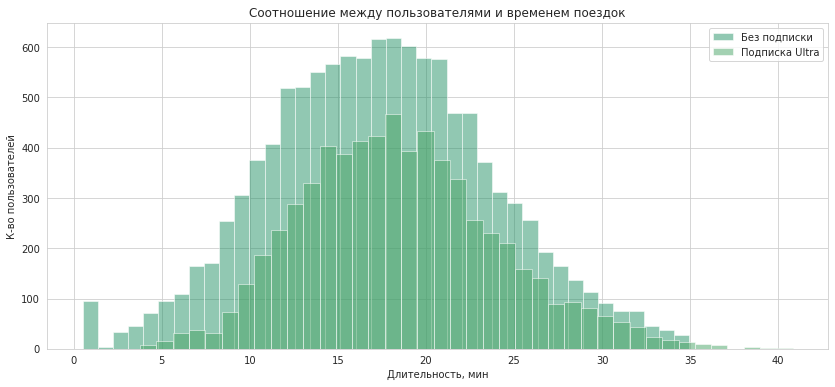

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 6)
ax.hist(free['duration'],label="Без подписки", bins=40, alpha=.5)
ax.hist(ultra['duration'],label="Подписка Ultra", bins=40, alpha=.5)
ax.set_title('Соотношение между пользователями и временем поездок')
ax.set_xlabel('Длительность, мин')
ax.set_ylabel('К-во пользователей')
ax.legend()
plt.show()

Типы распределений похожи, а различаются распределения по каличеству данных.

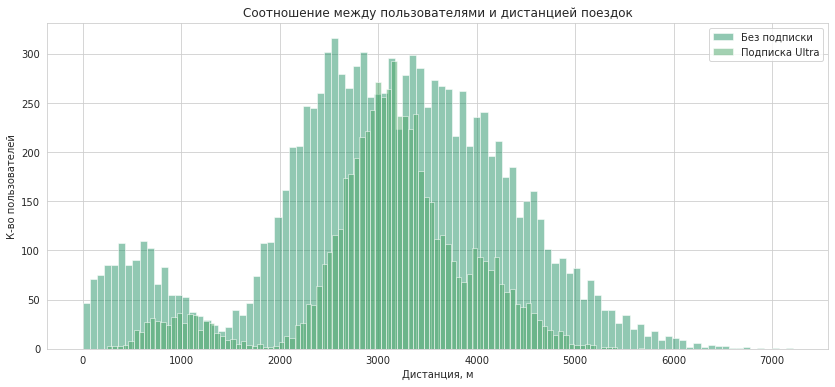

In [30]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 6)
ax.hist(free['distance'],label="Без подписки", bins=100, alpha=.5)
ax.hist(ultra['distance'],label="Подписка Ultra", bins=100, alpha=.5)
ax.set_title('Соотношение между пользователями и дистанцией поездок')
ax.set_xlabel('Дистанция, м')
ax.set_ylabel('К-во пользователей')
ax.legend()
plt.show()

По дистанции поездок есть интересные особенности. Как уже было сказано, аномально короткие дистанции связаны с пользователями без подписки. Возможно, дело не в разряженных самокатах, а в неудачных попытках авторизации в сервисе пользователей без подписки. Пользователи с подпиской чаще предпочитали поездки с расстоянием примерно от 2.5 до 3.5 км, а, следовательно, брали подписку, рассчитывая свои целенаправленные спланированные поездки. У пользователей без подписки этот интервал шире (примерно от 2 до 4.6 км).

Как и в предыдущем случае, высоты границ распределений связаны с разным размером выборок.

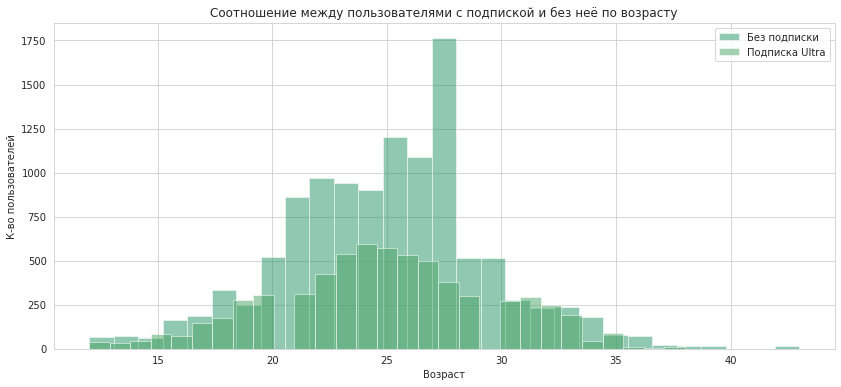

In [31]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 6)
ax.hist(free['age'],label="Без подписки", bins=29, alpha=.5)
ax.hist(ultra['age'],label="Подписка Ultra", bins=29, alpha=.5)
ax.set_title('Соотношение между пользователями с подпиской и без неё по возрасту')
ax.set_xlabel('Возраст')
ax.set_ylabel('К-во пользователей')
ax.legend()
plt.show()

Распределение по возрастам тоже подверглось влиянию соотношения величин групп пользователей с подпиской и без неё. Некоторые возраста пользователей конкретных категорий отсутствуют. Среди пользователей конкретных возрастов есть преобладания пользователей с подпиской, но они редки.

## Шаг 5. Подсчёт выручки

Создадим сводую таблицу для удобного расчёта помесячной выручки с пользователей.

In [32]:
total_data = data.pivot_table(
    index=('user_id', 'month_cal'), 
    values=[
        'distance', 
        'duration',
        'name',
        'minute_price', 
        'start_ride_price', 
        'subscription_fee',
    ], 
    aggfunc = {'name' : len,
               'distance': sum, 
               'duration' : sum, 
               'minute_price' : min, 
               'start_ride_price' : min, 
               'subscription_fee': min})
total_data.rename(columns = {'name' : 'count'}, inplace = True)
total_data['duration'] = np.ceil(total_data['duration']) # округление продолжительности поездок
total_data

distance  duration  minute_price  count  \
user_id month_cal                                                 
1       2021-01-01   7027.511294      42.0             6      2   
        2021-04-01    754.159807       7.0             6      1   
        2021-08-01   6723.470560      45.0             6      2   
        2021-10-01   5809.911100      32.0             6      2   
        2021-11-01   7003.499363      54.0             6      3   
...                          ...       ...           ...    ...   
1534    2021-06-01   3409.468534      25.0             8      2   
        2021-08-01   7622.453034      48.0             8      2   
        2021-09-01   4928.173852      23.0             8      1   
        2021-11-01  13350.015305      77.0             8      4   
        2021-12-01   2371.711192      16.0             8      1   

                    start_ride_price  subscription_fee  
user_id month_cal                                       
1       2021-01-01                 0               199  
        2021-04-01                 0               199  
        2021-08-01                 0               199  
        2021-10-01                 0               199  
        2021-11-01                 0               199  
...                              ...               ...  
1534    2021-06-01                50                 0  
        2021-08-01                50                 0  
        2021-09-01                50                 0  
        2021-11-01                50                 0  
        2021-12-01                50                 0  

[11331 rows x 6 columns]

Помесячная выручка считается по формуле: стоимость старта поездки ×  количество поездок +
стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [33]:
# рассчёт помесячной выручки
total_data['month_income'] = (total_data['start_ride_price'] * total_data['count']) + (
    total_data['minute_price'] * total_data['duration']) + total_data['subscription_fee']
total_data

distance  duration  minute_price  count  \
user_id month_cal                                                 
1       2021-01-01   7027.511294      42.0             6      2   
        2021-04-01    754.159807       7.0             6      1   
        2021-08-01   6723.470560      45.0             6      2   
        2021-10-01   5809.911100      32.0             6      2   
        2021-11-01   7003.499363      54.0             6      3   
...                          ...       ...           ...    ...   
1534    2021-06-01   3409.468534      25.0             8      2   
        2021-08-01   7622.453034      48.0             8      2   
        2021-09-01   4928.173852      23.0             8      1   
        2021-11-01  13350.015305      77.0             8      4   
        2021-12-01   2371.711192      16.0             8      1   

                    start_ride_price  subscription_fee  month_income  
user_id month_cal                                                     
1       2021-01-01                 0               199         451.0  
        2021-04-01                 0               199         241.0  
        2021-08-01                 0               199         469.0  
        2021-10-01                 0               199         391.0  
        2021-11-01                 0               199         523.0  
...                              ...               ...           ...  
1534    2021-06-01                50                 0         300.0  
        2021-08-01                50                 0         484.0  
        2021-09-01                50                 0         234.0  
        2021-11-01                50                 0         816.0  
        2021-12-01                50                 0         178.0  

[11331 rows x 7 columns]

subscription_fee,0,199
month_cal,,
2021-01-01,192362.0,143502.0
2021-02-01,164504.0,124266.0
2021-03-01,185638.0,142074.0
2021-04-01,183934.0,136826.0
2021-05-01,186334.0,148647.0
2021-06-01,190488.0,143342.0
2021-07-01,183558.0,142896.0
2021-08-01,185404.0,138096.0
2021-09-01,192100.0,128863.0


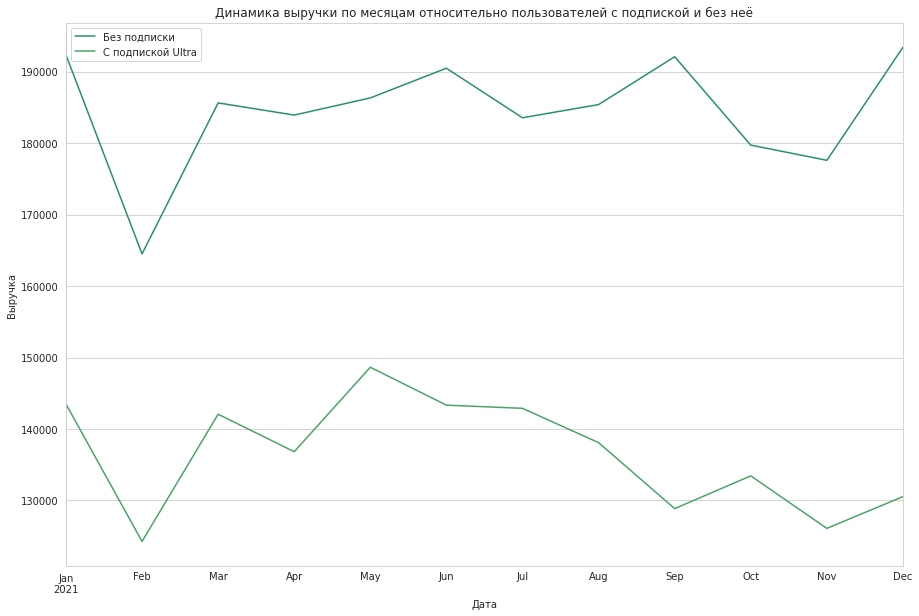

Средняя суммарная ежемесячная выручка c пользователей без подписки 
за анализируемый период времени: 184590.0 рублей

Средняя суммарная ежемесячная выручка c пользователей с подпиской 
за анализируемый период времени: 136549.75 рублей

Суммарная выручка c пользователей без подписки 
за анализируемый период времени: 2215080.0 рублей

Суммарная выручка c пользователей с подпиской 
за анализируемый период времени: 1638597.0 рублей


In [34]:
total_data_new = total_data.pivot_table(index='month_cal',
                columns='subscription_fee',
                values='month_income',
                aggfunc='sum')
display(total_data_new)
total_data_new.plot(grid=True, figsize=(15, 10))
plt.legend(['Без подписки', 'С подпиской Ultra'])
plt.title('Динамика выручки по месяцам относительно пользователей с подпиской и без неё')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()
print('''Средняя суммарная ежемесячная выручка c пользователей без подписки 
за анализируемый период времени:''', round(total_data_new[0].mean(),2), 'рублей')
print()
print('''Средняя суммарная ежемесячная выручка c пользователей с подпиской 
за анализируемый период времени:''', round(total_data_new[199].mean(),2), 'рублей')
print()
print('''Суммарная выручка c пользователей без подписки 
за анализируемый период времени:''', round(total_data_new[0].sum(),2), 'рублей')
print()
print('''Суммарная выручка c пользователей с подпиской 
за анализируемый период времени:''', round(total_data_new[199].sum(),2), 'рублей')

In [35]:
print('Общая выручка за анализируемый период времени:', total_data.month_income.sum(), 'рублей')
print('Средняя ежемесячная выручка по пользователям за анализируемый период времени:',
      round(total_data.month_income.mean(),2), 'рублей')

Общая выручка за анализируемый период времени: 3853677.0 рублей
Средняя ежемесячная выручка по пользователям за анализируемый период времени: 340.1 рублей


**В среднем, пользователи без подписки приносят больше денег компании.**

## Шаг 6. Проверка гипотез
### Гипотеза 1
Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

**Гипотеза Н0**: Средняя продолжительность поездок с подпиской и без неё равна.

**Гипотеза Н1**: Средняя продолжительность поездок с подпиской БОЛЬШЕ, чем без подписки.

*alpha = 0.05*

In [36]:
ultra_du = ultra['duration'] 
free_du = free['duration']

# две независимые выборки
results = st.ttest_ind(ultra_du, free_du, equal_var=False, alternative = 'greater') 

alpha = 0.05

print('Средняя продолжительность поездок у пользователей с подпиской', ultra['duration'].mean())
print('Средняя продолжительность поездок у пользователей без подписки', free['duration'].mean())
print('p-значение',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средняя продолжительность поездок у пользователей с подпиской 18.54198516280583
Средняя продолжительность поездок у пользователей без подписки 17.39090929866399
p-значение 5.6757813771289775e-37
Отвергаем нулевую гипотезу


Средняя продолжительность поездок у пользователей с подпиской больше. 

### Гипотеза 2
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

**Гипотеза Н0**: Среднее расстояние , которое проезжают пользователи с подпиской за одну поездку, равно 3130 метрам.

**Гипотеза Н1**: Среднее расстояние , которое проезжают пользователи с подпиской за одну поездку, БОЛЬШЕ 3130 метров.

*alpha = 0.05*

In [37]:
ultra_dist = ultra.distance
interested_value = 3130.0

# одна выборка
results = st.ttest_1samp(ultra_dist, interested_value, alternative='greater') 

alpha = 0.05

print('Средняя продолжительность поездок у пользователей с подпиской', ultra['distance'].mean())
print('p-значение',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средняя продолжительность поездок у пользователей с подпиской 3115.4453880370247
p-значение 0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Среднее расстояние , которое проезжают пользователи с подпиской за одну поездку, примерно равно 3130 метрам.

### Гипотеза 3
Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

**Гипотеза Н0**: Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.

**Гипотеза Н1**: Помесячная выручка от пользователей с подпиской по месяцам ВЫШЕ, чем выручка от пользователей без подписки.

*alpha = 0.05*

In [38]:
ultra_inc = total_data.loc[total_data.subscription_fee > 0, 'month_income'] 

free_inc = total_data.loc[total_data.subscription_fee == 0, 'month_income'] 

# две независимые выборки
results = st.ttest_ind(ultra_inc, free_inc, equal_var=False, alternative = 'greater') 

alpha = 0.05

print('''Средняя ежемесячная выручка c пользователей без подписки 
за анализируемый период времени:''', round(total_data.loc[total_data.subscription_fee == 0, 'month_income'].mean(),2), 'рублей')
print()
print('''Средняя ежемесячная выручка c пользователей с подпиской 
за анализируемый период времени:''', round(total_data.loc[total_data.subscription_fee > 0, 'month_income'].mean(),2), 'рублей')
print()
print('p-значение',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средняя ежемесячная выручка c пользователей без подписки 
за анализируемый период времени: 325.84 рублей

Средняя ежемесячная выручка c пользователей с подпиской 
за анализируемый период времени: 361.48 рублей

p-значение 1.0718729651261336e-44
Отвергаем нулевую гипотезу


Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

### Ситуация
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

ОТВЕТ: воспользуемся гипотезой о равенстве средних для зависимых (парных) выборок, поскольку одну выборку тестируют до и после обновления.

**Гипотеза H0**: Среднее количество обращений до обновления сервиса равно среднему количеству обращений после обновления.

**Гипотеза H1**: Среднее количество обращений до обновления сервиса больше среднего количества обращений после обновления.

## Шаг 7. Распределения

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [39]:
k=99
p=0.1
prob=[]
for n in range (1,10000):
    prob.append(binom.cdf(k, n, p))
    if binom.cdf(k, n, p) <= 0.05:
        print("Минимальное число промокодов",n) 
        break

Минимальное число промокодов 1161


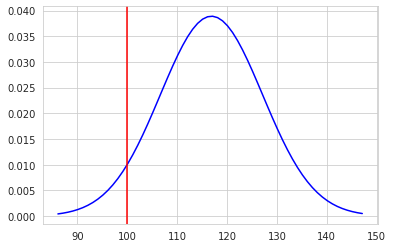

100.02841955223582

In [40]:
# функция расчета количества успешных экспериментов Бернулли
# путем аппроксимации биномиального распределения нормальным
def cnsbe(n, p, x):
    # параметры биноминального распределения:
    # n - количество экспериментов
    # p - вероятность успеха
    # x - вероятность расчитываемого значения
    
    # расчет параметров нормального распределения
    mu = n * p
    sigma = (n * p * (1 - p))**.5
    # расчет нормального распределения
    distr = st.norm(mu, sigma)
    
    # расчет значения для заданной вероятности x
    result = distr.ppf(x)
    
    # построение графика
    arange = np.arange(
        (mu - 3 * sigma), 
        (mu + 3 * sigma), 
        1
    )
    plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
    plt.axvline(x=result, color='red')
    plt.show()
    
    return result
cnsbe(1169, .1, .05)

**Два рассчёта с разной степенью точности говорят о необходимости раздачи примерно от 1161 до 1172 промокодов.**

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

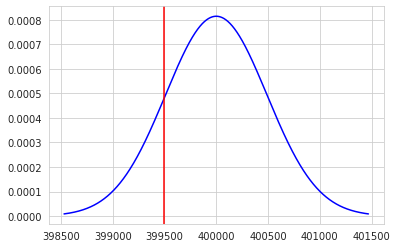

Вероятность примерно равна 15.37 %


In [41]:
# функция расчета вероятности проведения успешных экспериментов Бернули
# путем аппроксимации биномиального распределения нормальным
def cpsbe(n, p, x):
    # параметры биноминального распределения:
    # n - количество экспериментов
    # p - вероятность успеха
    # x - заданное значение, для которого расчитывается вероятность
    
    # расчет параметров нормального распределения
    mu = n * p
    sigma = (n * p * (1 - p))**.5
    # расчет нормального распределения
    distr = st.norm(mu, sigma)
    
    # расчет вероятности для заданного значения x
    result = distr.cdf(x)
    
    # построение графика
    arange = np.arange(
        (mu - 3 * sigma), 
        (mu + 3 * sigma), 
        1
    )
    plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
    plt.axvline(x=x, color='red')
    plt.show()
    
    return print(f'Вероятность примерно равна {round(result*100, 2)} %')
cpsbe(1000000, .4, 399500)

**Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равна 15.37%.**

## Шаг 8. Общий вывод

Цель проекта достигнута: проанализированы данные сервиса аренды самокатов GoFast и проверены некоторые гипотезы о возможностях для роста доходов компании.

* Большинство пользователей сервиса сосредоточено в Пятигорске, а меньше всего - в Москве. Пользователей с подпиской 699 (45.57%), а пользователей без подписки 835 (54.43%), то есть разница в 136 пользователей. Около половины пользователей в возрасте от 22 до 28 лет. Средний возраст пользователей составляет почти 25 лет.


* Основные типы дистанций поездок пользователей сосредоточены в интервалах от 0 до 1.3 км и от 1.8 км до 4.6 км. Для более далёких дистанций удобнее пользоваться общественным транспортом или идти пешком. Некоторые поездки совершаются не в качестве маршрута от точки до точки, а в качестве прогулочного маршрута.


* Поездки меньше 5 минут связаны со сбоями или же необходимостью быстро добраться до близкой точки, остальные же скорее ориентированы на более дальние передвижения или прогулочные маршруты. Самая продолжительная поездка длилась почти 41 минуту. Стандартный интервал времени - 15-20 минут.


* Пользователей без подписки больше на пару сотен, но поездок у таких пользователей больше почти в 2 раза. Сбои по времени поездок связаны только с пользователями без подписки.


* Возможно, дело не в разряженных самокатах, а в неудачных попытках авторизации в сервисе пользователей без подписки. Пользователи с подпиской чаще предпочитали поездки с расстоянием примерно от 2.5 до 3.5 км, а, следовательно, брали подписку, рассчитывая свои целенаправленные спланированные поездки. У пользователей без подписки этот интервал шире (примерно от 2 до 4.6 км).


*Средняя суммарная ежемесячная выручка c пользователей без подписки 
за анализируемый период времени: 184 590.00 рублей*

*Средняя суммарная ежемесячная выручка c пользователей с подпиской 
за анализируемый период времени: 136 549.75 рублей*

*Суммарная выручка c пользователей без подписки 
за анализируемый период времени: 2 215 080.00 рублей*

*Суммарная выручка c пользователей с подпиской 
за анализируемый период времени: 1 638 597.00 рублей*

*Общая выручка за анализируемый период времени: 3 853 677.00 рублей*

*Средняя ежемесячная выручка по пользователям за анализируемый период времени: 340.10 рублей*

**В среднем, пользователи без подписки приносят больше денег компании.**

* Средняя продолжительность поездок у пользователей с подпиской больше.


* Среднее расстояние , которое проезжают пользователи с подпиской за одну поездку, примерно равно 3130 метрам.

*Средняя ежемесячная выручка c пользователей без подписки 
за анализируемый период времени: 325.84 рублей*

*Средняя ежемесячная выручка c пользователей с подпиской 
за анализируемый период времени: 361.48 рублей*

* Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Ситуация: "Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?"**

ОТВЕТ: воспользуемся гипотезой о равенстве средних для зависимых (парных) выборок, поскольку одну выборку тестируют до и после обновления.

* Требуется разослать 1161-1172 промокода, которые приводят к продлению подписки с вероятностью 10%, чтобы 100 клиентов продлили подписку с вероятностью неуспеха не более 5%.


* **Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равна 15.37%.**